<a href="https://colab.research.google.com/github/nounou-mimi/SIC-checkpoints/blob/main/Checkpoint7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import sklearn
from sklearn import tree
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score,confusion_matrix
from sklearn.model_selection import train_test_split

In [ ]:
data = pd.read_csv('titanic-passengers.csv',sep=';')

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    object 
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(4), object(6)
memory usage: 83.7+ KB


##Data Preprocessing:


###missing values

In [ ]:
percent = data.isnull().sum()/len(data)*100
missing_data = pd.concat([data.isnull().sum(), percent],axis=1,keys=['Total','%'])
missing_data

,Total,%
PassengerId,0,0.000000
Survived,0,0.000000
Pclass,0,0.000000
Name,0,0.000000
Sex,0,0.000000
Age,177,19.865320
SibSp,0,0.000000
Parch,0,0.000000
Ticket,0,0.000000
Fare,0,0.000000


- PassengerId should be removed.

- Age has 177 (20%) missing values. We can use the mean by sex to replace missing values.

- Cabin has more than 77% of missing values, we can drop it. We can also change its calue to 1 for known and 0for unknown.

- The Embarked feature has only 2 missing values, We can drop these observations.

In [ ]:
data.drop(columns={'PassengerId'},axis=1,inplace=True)

In [ ]:
data.drop(columns={'Cabin','Ticket'},inplace=True)

In [ ]:
data.dropna(subset=['Embarked'],inplace=True)


In [ ]:
#Age
meanAge = data.groupby(['Sex'])['Age'].transform('mean')
data['Age'] = data['Age'].fillna(meanAge)
#Embarked
data['Embarked'].fillna(data['Embarked'].mode()[0], inplace = True)    

##Converting categorical features

In [ ]:
sex = pd.get_dummies(data['Sex'],drop_first=True)
embark = pd.get_dummies(data['Embarked'],drop_first=True)
data.drop(['Sex','Embarked'],axis=1,inplace=True)
data = pd.concat([data,sex,embark],axis=1)
data.head(20)

,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,No,2,28.000000,0,0,13.0000,1,0,1
1,No,3,25.000000,0,0,7.6500,1,0,1
2,No,3,20.000000,0,0,7.8542,1,0,1
3,No,3,29.000000,0,4,21.0750,0,0,1
4,No,1,31.000000,1,0,52.0000,1,0,1
5,No,3,37.000000,2,0,7.9250,1,0,1
6,No,3,19.000000,0,0,14.5000,1,0,1
7,Yes,3,1.000000,0,2,15.7417,0,0,0
8,No,3,20.500000,0,0,7.2500,1,0,1
9,Yes,2,42.000000,1,0,26.0000,0,0,1


# Decision Tree

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(data.drop('Survived',axis=1), 
                                                    data['Survived'], 
                                                    test_size=0.30, 
                                                    random_state=200)


In [ ]:
model=DecisionTreeClassifier()


In [ ]:
model.fit(x_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

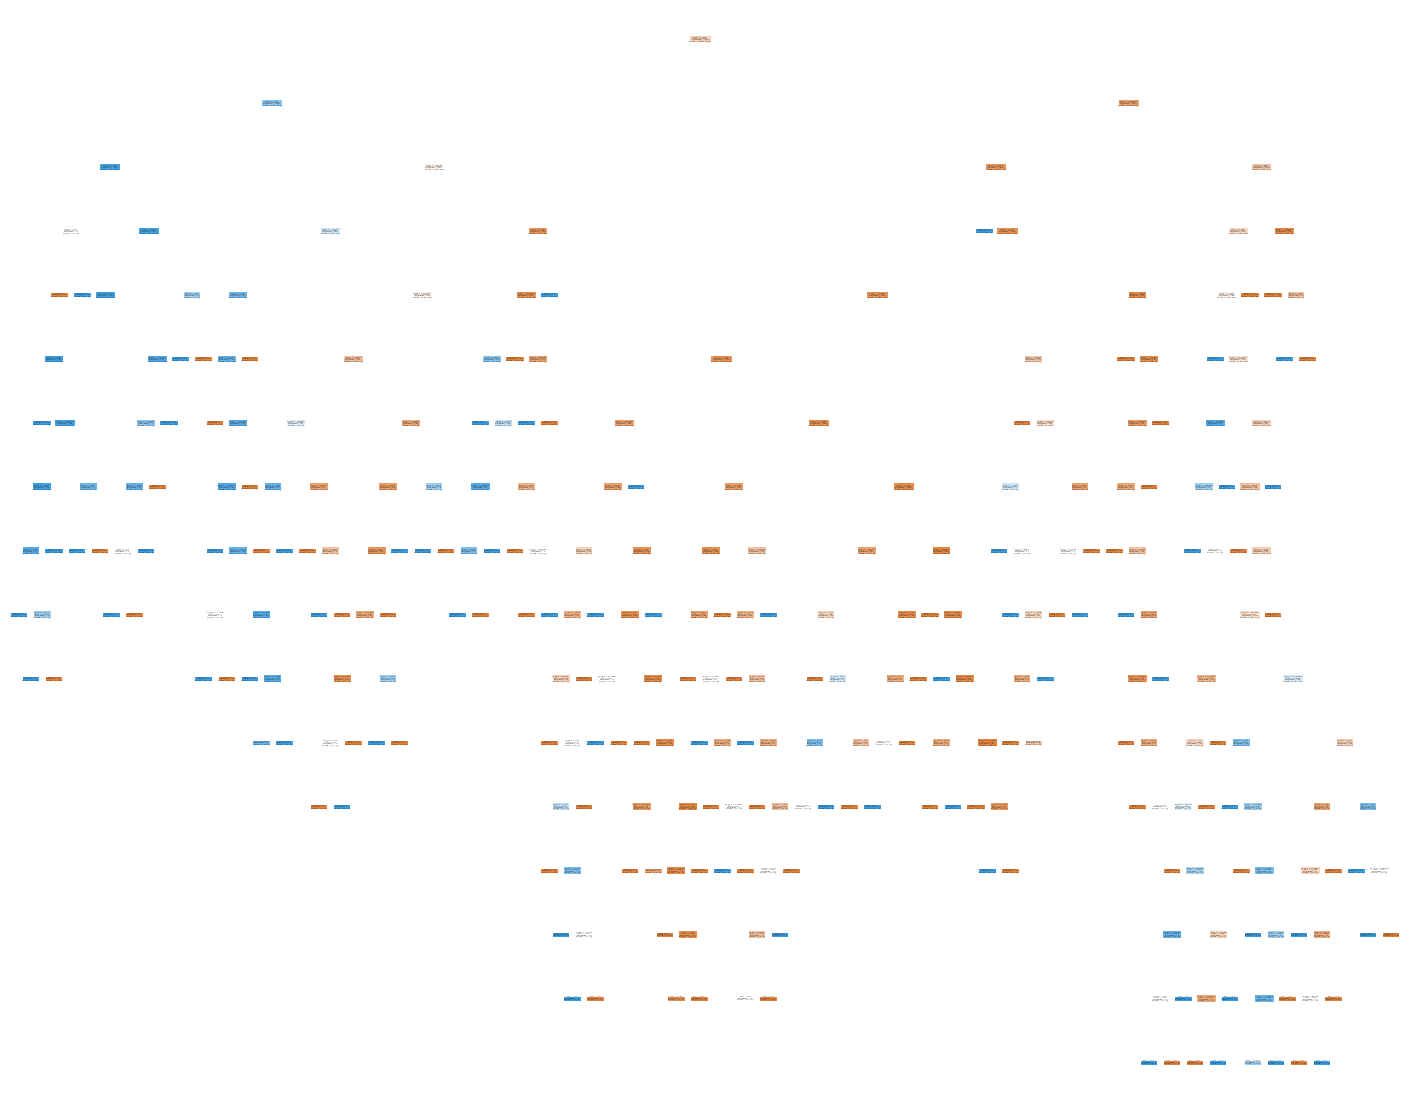

In [ ]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(25,20))
tree_plt = sklearn.tree.plot_tree(model,filled=True)

In [ ]:
from sklearn.metrics import accuracy_score
y_pred=model.predict(x_test)
accuracy_score(y_test,y_pred)

0.7940074906367042

too big!!! We need to limit the depth, number of considered features and number of leaf nodes (Pruning)

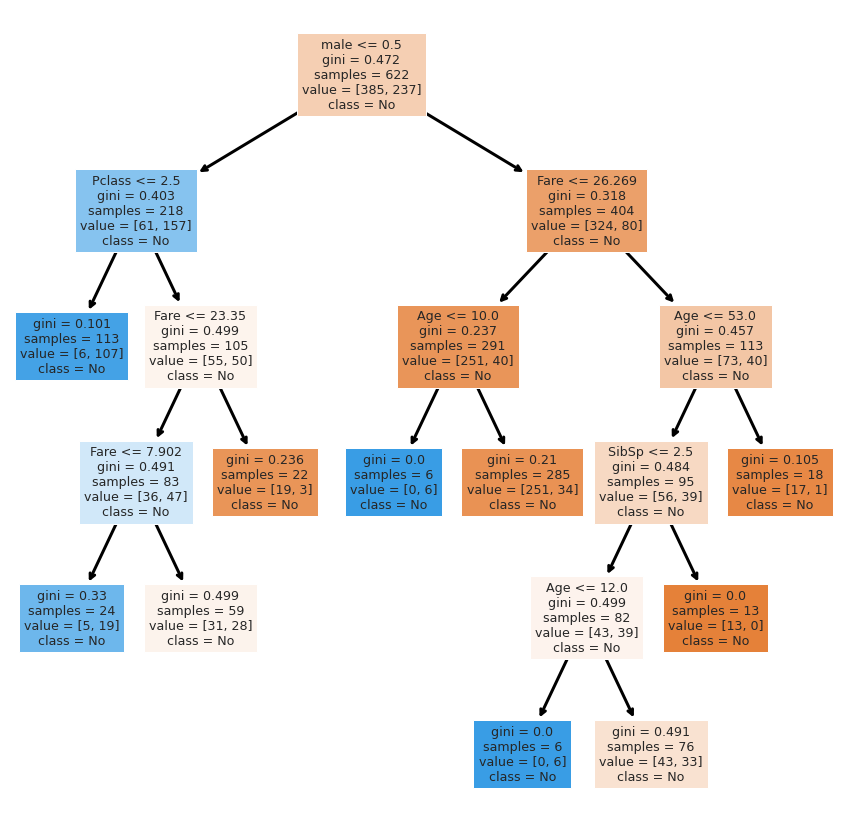

In [ ]:
model=model=DecisionTreeClassifier(criterion='gini',max_leaf_nodes=10,min_samples_leaf=5,max_depth=5)
model.fit(x_train,y_train)
fig = plt.figure(figsize=(15,15))
out = sklearn.tree.plot_tree(model,feature_names=data.drop('Survived',axis=1).columns,class_names=data['Survived'],filled=True)
for o in out: #to show arrows
    arrow = o.arrow_patch
    if arrow is not None:
        arrow.set_edgecolor('black')
        arrow.set_linewidth(3)

Let's say we are a woman, aged 21, 2nd class, with Sibsp=4 and fare = 80. We go respectively starting from the root node : right,right,left,right

In [ ]:
from sklearn.metrics import accuracy_score
y_pred=model.predict(x_test)
accuracy_score(y_test,y_pred)

0.8314606741573034

#Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier()
rf.fit(x_train, y_train)  #Training our model
y_pred_rf=rf.predict(x_test)  #testing our model
print("Accuracy:", accuracy_score(y_test, y_pred_rf))  

Accuracy: 0.850187265917603


Changing number of estimators

Accuracy when number of estimators is 5: 0.8164794007490637
Accuracy when number of estimators is 10: 0.8164794007490637
Accuracy when number of estimators is 90: 0.850187265917603
Accuracy when number of estimators is 100: 0.8277153558052435
Accuracy when number of estimators is 110: 0.8314606741573034
Accuracy when number of estimators is 120: 0.8277153558052435
Accuracy when number of estimators is 130: 0.8314606741573034
Accuracy when number of estimators is 140: 0.8314606741573034
Accuracy when number of estimators is 150: 0.8314606741573034
Accuracy when number of estimators is 160: 0.8352059925093633
Accuracy when number of estimators is 180: 0.8352059925093633
Accuracy when number of estimators is 200: 0.8352059925093633


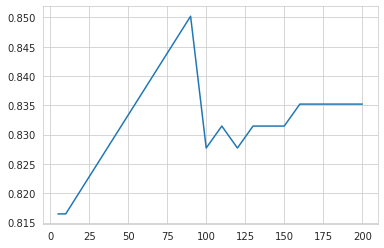

In [ ]:
estimators=[5,10,90,100,110,120,130,140,150,160,180,200]
accuracies=[]
for e in estimators:
  rf=RandomForestClassifier(n_estimators=e)
  rf.fit(x_train, y_train)  #Training our model
  y_pred_rf=rf.predict(x_test)  #testing our model
  print(f"Accuracy when number of estimators is {e}:", accuracy_score(y_test, y_pred_rf))  
  accuracies.append(accuracy_score(y_test,y_pred_rf))
plt.plot(estimators,accuracies)


All values of accuracy are comprised between 0.8 and 0.85 , not much difference, and when we execute several times the shape of the plot changes so we cannot conclude anything